In [17]:
import numpy as np
from matplotlib import pyplot as plt

normal mode periods, T1 [s] =  6.283185307179586 T2 [s] =  3.6275987284684357


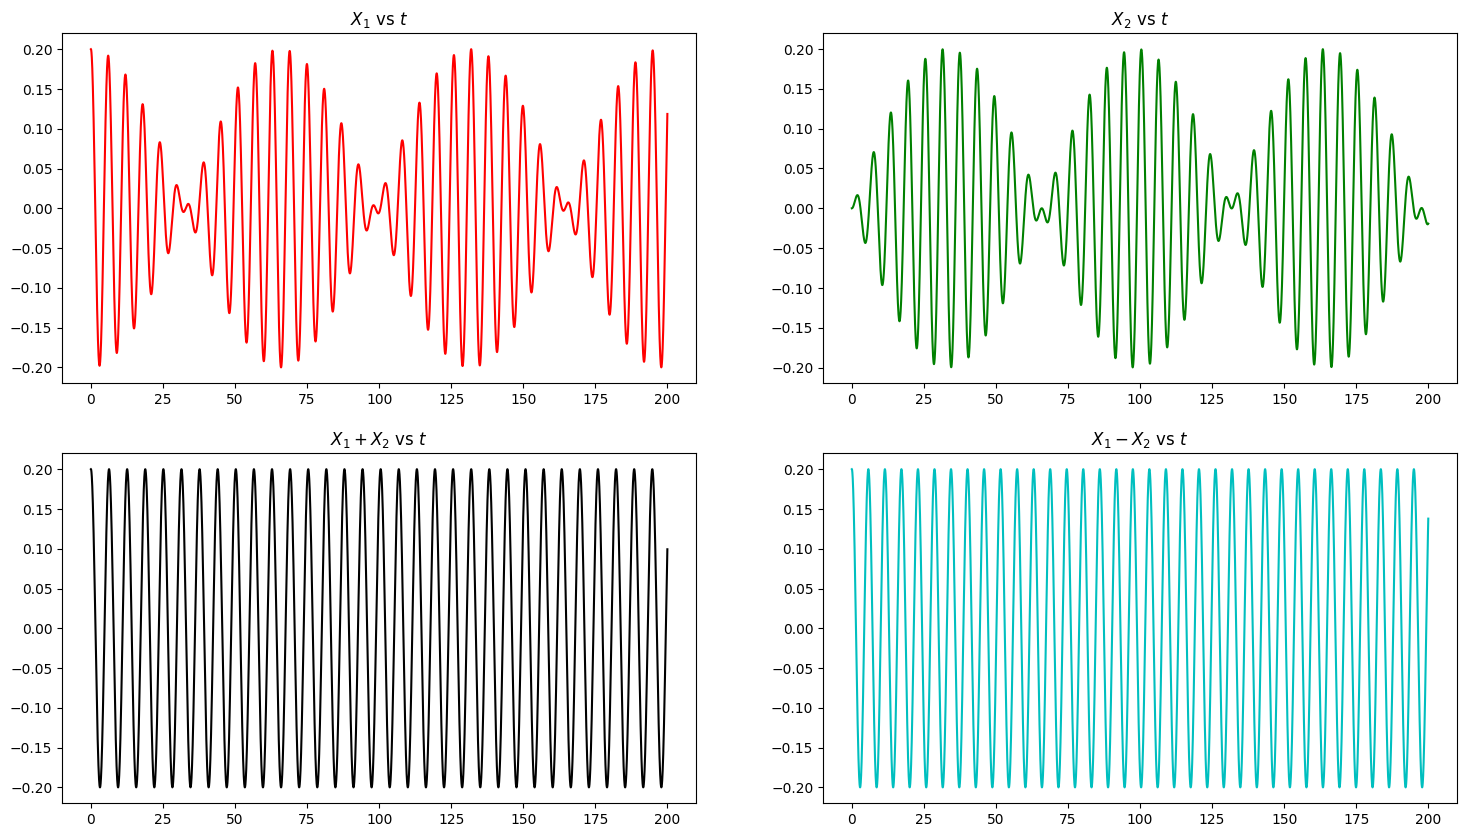

In [28]:
m1, m2 = 1.0, 1.0          # block masses [kg]

k1, k2, k3 = 1.0, 0.1, 1.0 # spring constants [N/m]

x1, x2 = +0.2, 0.0       # initial displacement from equilibrium [m]

v1, v2 = 0, 0              # initial time, velocities [m/s]

t, dt = 0, 0.01            # clock, tick

# initial accelerations
a1 = ( -(k1+k2)*x1 + k2*x2 ) / m1
a2 = ( +k2*x1 - (k2+k3)*x2 ) / m2

# normal mode freqs, periods (for comparison to numerical soln)
omega1 = np.sqrt(k1/m1)
omega2 = np.sqrt(3*k1/m1)
T1 = 2.*np.pi/omega1
T2 = 2.*np.pi/omega2
print("normal mode periods, T1 [s] = ", T1, "T2 [s] = ", T2)

# lists for storing data
X_1 = [x1]
X_2 = [x2]
Time = [t]

while (t < 200): # drift-kick-drift method

    # drift to mid-point
    x1 += v1*dt/2
    x2 += v2*dt/2

    # kick velocity at mid-point
    a1 = ( -(k1+k2)*x1 + k2*x2) / m1
    a2 = ( +k2*x1 - (k2+k3)*x2) / m2
    v1 += a1*dt
    v2 += a2*dt

    # drift to end-point
    x1 += v1*dt/2
    x2 += v2*dt/2

    # update clock
    t += dt

    # append coordinates to coordinate lists
    X_1.append(x1)
    X_2.append(x2)
    Time.append(t)

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2,ncols= 2,figsize = (18,10))

ax1.set_title(r'$X_1$ vs $t$')
ax2.set_title(r'$X_2$ vs $t$')
ax3.set_title(r'$X_1+X_2$ vs $t$')
ax4.set_title(r'$X_1-X_2$ vs $t$')

ax1.plot(Time,X_1,'r')
ax2.plot(Time,X_2,'g')
ax3.plot(Time,np.array(X_1)+np.array(X_2),'k')
ax4.plot(Time,np.array(X_1)-np.array(X_2),'c')

plt.show()